# Taller #1 Clasificador KNN del conjunto Iris dataset

### Presentado por: Leonardo Sánchez
### Presentado a: Jan Polanco Velasco
### Universidad Autónoma de Occidente
### Especialización en Inteligencia Artificial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import matplotlib
import sys

In [2]:
print("Versión de Python:", sys.version)
print(f"Version de Pandas {pd.__version__}")
print(f"Version de Numpy {pd.__version__}")
print(f"Version de Matplotlib {matplotlib.__version__}")
print(f"Version de Seaborn {sns.__version__}")
print(f"Version de Skelearn {sklearn.__version__}")


Versión de Python: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
Version de Pandas 2.2.1
Version de Numpy 2.2.1
Version de Matplotlib 3.8.3
Version de Seaborn 0.13.2
Version de Skelearn 1.4.1.post1


Primero cargamos los datos desde skelearn 

In [3]:
from sklearn.datasets import load_iris
# carga de datos
data_iris = load_iris()

Ahora lo transformamos en un dataframe

In [4]:
df_iris = pd.DataFrame(data=data_iris.data, columns=data_iris.feature_names) # dataframe de los datos 
df_iris["target"] = data_iris.target # cargamos las etiquetas o target 
df_iris.head() # mostramos las 5 primeras filas 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


veamos las especies y su correspondiente etiqueta

In [5]:
especies = data_iris.target_names
etiquetas = df_iris["target"].unique()

for especie, etiqueta in zip(especies, etiquetas):
    print(f"especie {especie} -> etiqueta {etiqueta}")

especie setosa -> etiqueta 0
especie versicolor -> etiqueta 1
especie virginica -> etiqueta 2


Ahora la información  y sus estadisticas basicas 

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


vemos que no hay datos nulos y las caracteristicas son numéricas continuas es decir flotantes.

Otra forma de ver valores nulos es 

In [7]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Ahoras las estadísticas basicas

In [8]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


De la salida anterior vemos que no hay valores de longitud de cero en la fila minimo valor, lo cual, es importante ya que esto valores de cero no existen ya que es la longitud de una parte de la flor y pueden afectar el desempeño del modelo. 

Revicemos las caracteristicas del data set iris, para esto veamos una imagen de las flores iris primero.

<div style="text-align:center;">
    <p style="text-align:center; font-family: Arial, sans-serif; font-size: 18px; font-weight: bold; margin-bottom: 2px;">Flor iris</p>
    <img src="Flor_iris.png">
    <p style="text-align:center;">Flor del tipo iris donde se muestra el petalo y el sepalo donde se miden las caracteristicas del dataset</p>
</div>

# Descripcion del data set iris
El conjunto de datos Iris consiste en medidas de cuatro características de muestras de tres especies de flores Iris: Setosa, Versicolor y Virginica. Estas características son:

| Característica | Descripción      | Tipo de Variable |                                                                           
|:---------------|:-----------------|:------------------|
| Longitud del sepalo| Largo del sepalo en cm| continua, flotante positiva >0|   
| Ancho del sepalo   | Ancho del sepalo en cm| continua, flotante positiva >0|  
| Longitud del petalo| Largo del petalo en cm| continua, flotante positiva >0|                                                                           
| Ancho del petalo   | Ancho del petalo en cm| continua, flotante positiva >0|  








Ya entendiendo las descripción de cada caracteristica y su tipo, pasamos a graficar sus histogramas, de primera mano usando la función hist()



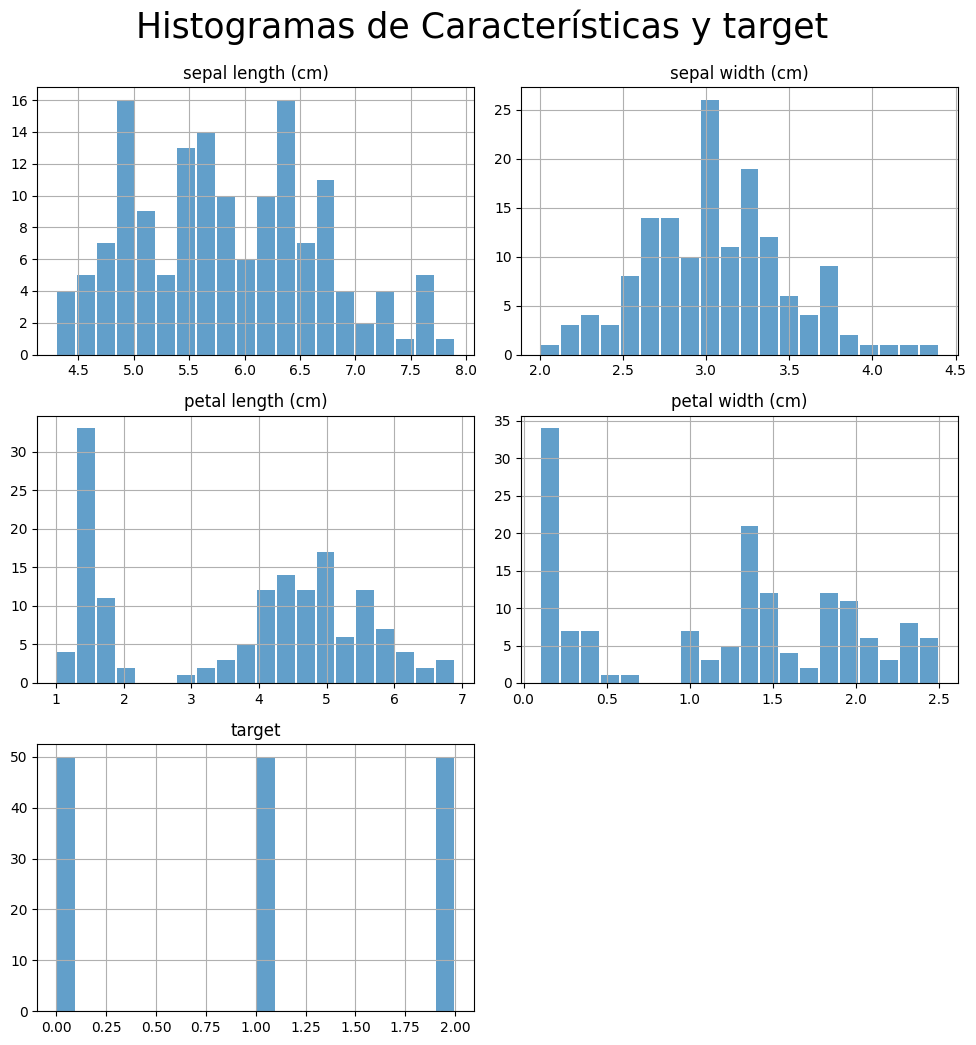

In [9]:
df_iris.hist(figsize=(10, 10),bins=20,rwidth=0.9,alpha=0.7)  # Organiza los histogramas en una cuadrícula de 2 filas y 2 columnas
plt.tight_layout()  # Ajusta automáticamente los subplots para evitar solapamientos
plt.suptitle("Histogramas de Características y target", fontsize=25, x=0.5, y=1.04)  # Título global
plt.show()

En el histograma anterior se mesclan las clases, veamos teniendo en cuenta las clases 

In [10]:
columnas = df_iris.columns[:-1] # obtenemos el nombre de las caracteristicas sin el target
columnas

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

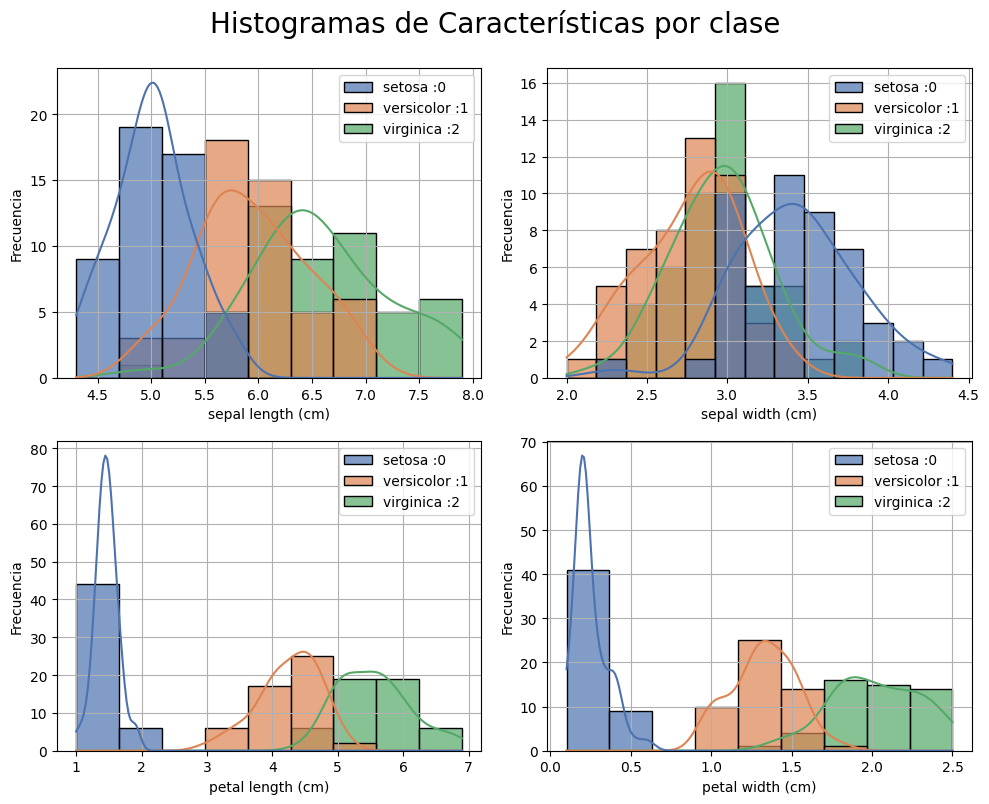

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10, 8))
ax=ax.ravel()
for indice, caracteristica in enumerate(columnas):
    g2 = sns.histplot(data=df_iris, x=caracteristica, hue='target', ax=ax[indice],kde="True",palette="deep",alpha=0.7)
    handles = g2.get_legend().legend_handles # obtiene los handels
    ax[indice].grid(True) # dibula la grilla
    ax[indice].set_ylabel("Frecuencia") # titulo eje y
    labels = [ 'setosa :0', 'versicolor :1','virginica :2'] # Nuevas labels
    ax[indice].legend(handles, labels)
plt.suptitle("Histogramas de Características por clase", fontsize=20, x=0.5, y=1)  # Título global
plt.tight_layout()

Ahora miramos el balanceo de clases

In [12]:
# Contamos las clases de las especies
class_counts = df_iris['target'].value_counts()
class_counts

target
0    50
1    50
2    50
Name: count, dtype: int64

In [13]:
df_iris["target"].value_counts(normalize=True) * 100

target
0    33.333333
1    33.333333
2    33.333333
Name: proportion, dtype: float64

Vemos tambien que el porcentaje de claca clase es 33.3 periodico, ya que hay tres clases.

Grafiquemos las etiquetas ahora

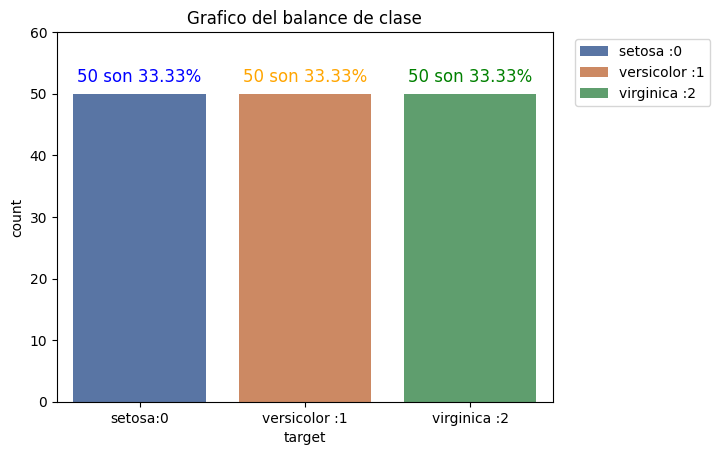

In [14]:
# Crear un gráfico de barras de conteo 
s2 = sns.countplot(data=df_iris, x='target',hue='target',palette="deep")
# titulo
plt.title("Grafico del balance de clase")
# cambio las ticks del eje x
plt.xticks([0, 1, 2], [ 'setosa:0', 'versicolor :1','virginica :2'])
# textos localizados
plt.text(0, 52, '50 son 33.33%', fontsize=12, ha='center',color='blue')
plt.text(1, 52, '50 son 33.33%', fontsize=12, ha='center',color='orange')
plt.text(2, 52, '50 son 33.33%', fontsize=12, ha='center',color='green')
# limite del eje y
plt.ylim(0,60)
# obtiene los handels del grafico
handles = s2.get_legend().legend_handles # obtiene los handels
# coloca los nuevos labels
plt.legend(bbox_to_anchor=(1.03, 1), handles=handles,labels=[ 'setosa :0', 'versicolor :1','virginica :2'])
plt.show()

Vemos de las salidas anteriores que el conjunto de datos esta balanceado.

Ahora podemos realizar los graficos de cajas para ver si hay valores atipicos en los datos.

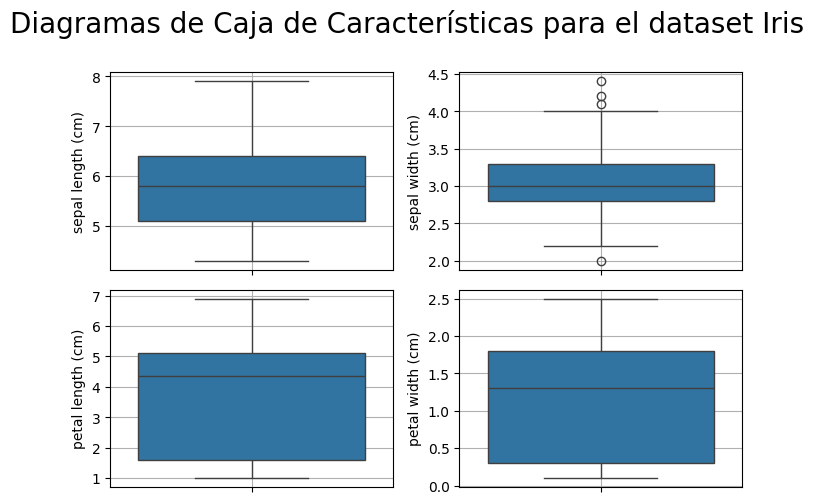

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5),alpha=0.7)
ax = ax.ravel()

for indice, caracteristica in enumerate(columnas):
    sns.boxplot(data=df_iris, y=caracteristica, ax=ax[indice])
    ax[indice].grid(True)
    ax[indice].set_ylabel(caracteristica)
plt.suptitle("Diagramas de Caja de Características para el dataset Iris", fontsize=20, x=0.5, y=1.0)
plt.tight_layout()
plt.show()

Vemos que solo hay posibles valores outliers o atípicos en el ancho del setalo, sin embargo, estos valores puden ser debido a la variabilidad intrinseca de los datos y no a errores en la medición o en las consigación en la base de datos. 

Grafiquemos ahora teniendo en cuenta las clases

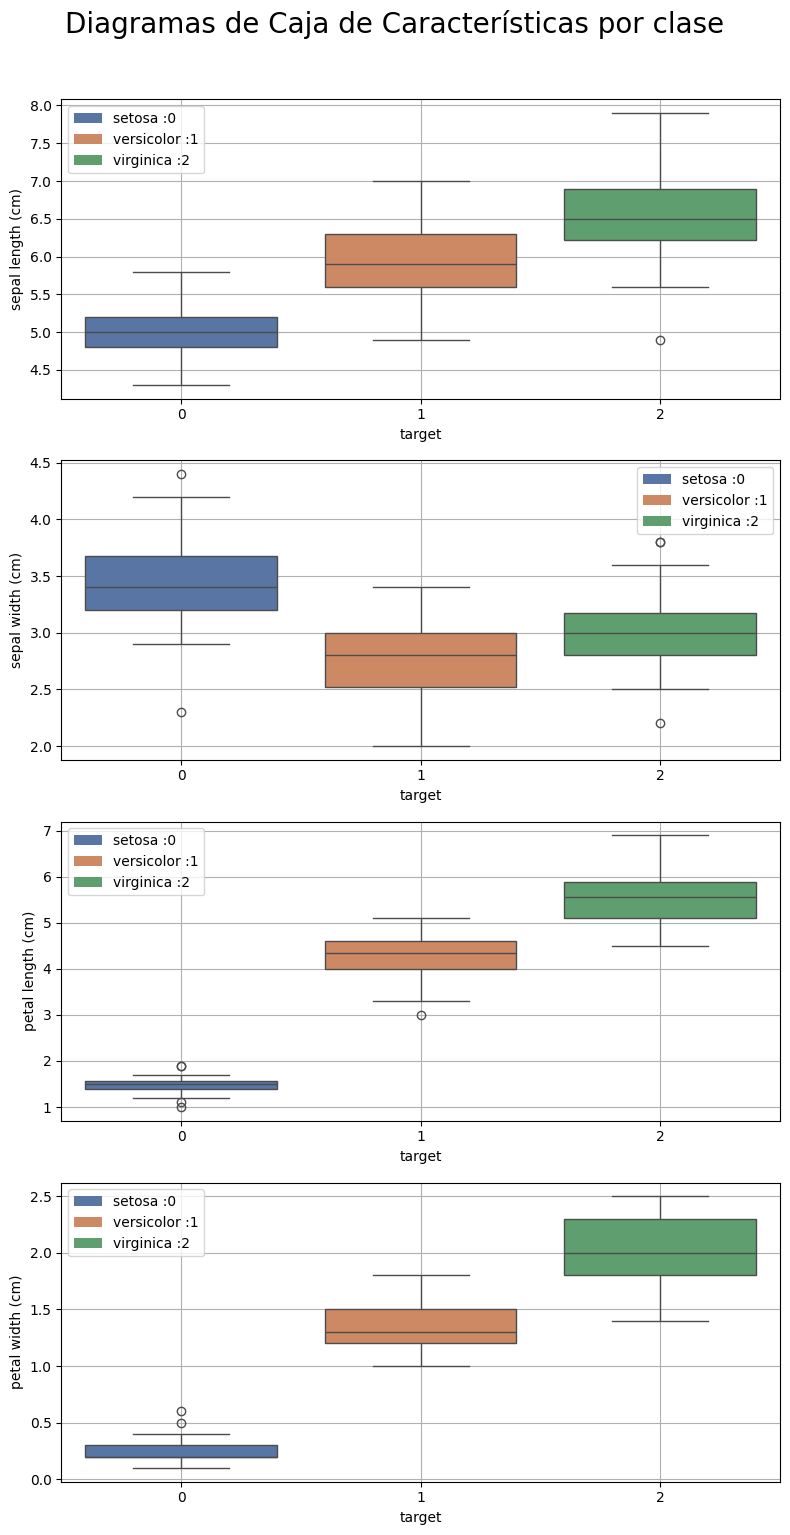

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(8, 15),alpha=0.7)
ax = ax.ravel()

for indice, caracteristica in enumerate(columnas):
    sns.boxplot(data=df_iris, y=caracteristica, x='target', ax=ax[indice],hue="target",palette="deep")
    ax[indice].grid(True)
    ax[indice].set_ylabel(caracteristica)
    handles = s2.get_legend().legend_handles # obtiene los handels
    labels = [ 'setosa :0', 'versicolor :1','virginica :2'] # Nuevas labels
    ax[indice].legend(handles, labels,)
plt.suptitle("Diagramas de Caja de Características por clase", fontsize=20, x=0.5, y=1.02)
plt.tight_layout()
plt.show()

Vemos que la calse setosa presenta mas outliers que las otros dos clases, sin embarfo, puede deberse a la variación intrinseca de los datos y no a valores mas escritos o medidos. 

Ahora las respuestas al taller

##### 1. Visualiza los datos, por lo menos usando scatter matrix (https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) 

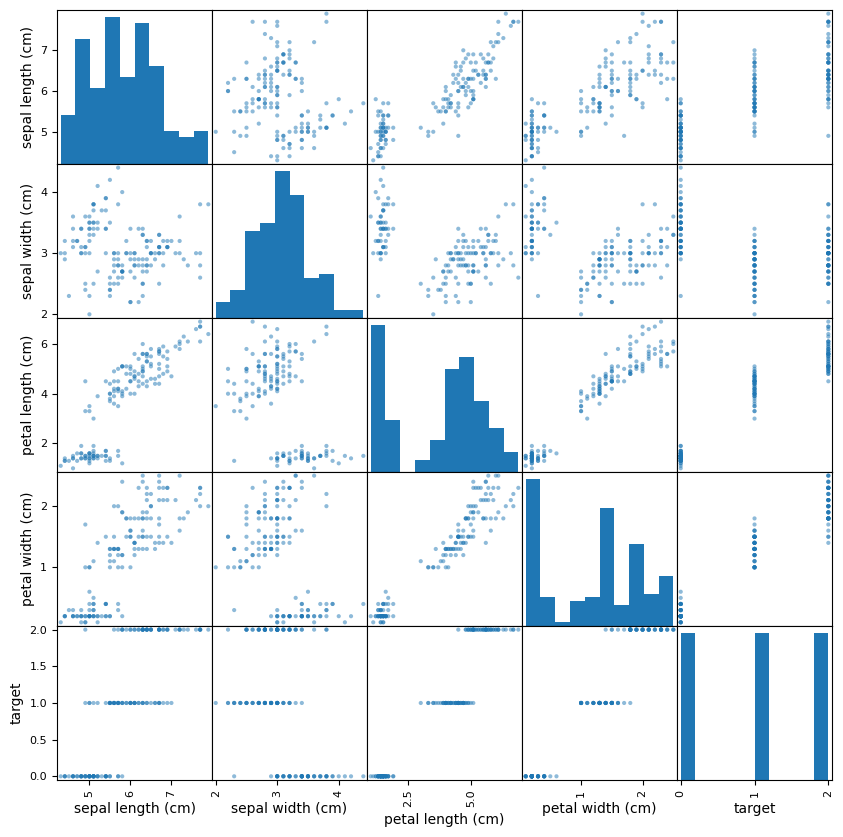

In [17]:
color_map = {'0': 'red', '1': 'blue', '2': 'green'}
colors = df_iris['target'].map(color_map)
pd.plotting.scatter_matrix(df_iris, figsize=(10, 10))
plt.show()

La figura anterior es el diagrama de dispersión de pares de caracteristicas y la variable objetivo, asi como el histograma de cada variable, sin embargo, este diagrama no es muy eficiente,ya que, no separa las clases, por lo menos facilmente dentro de la función  pd.plotting.scatter_matrix, una mejor opción para graficar los pares de variables es la función seaborn.pairplot(), acontinuación lo vemos. 

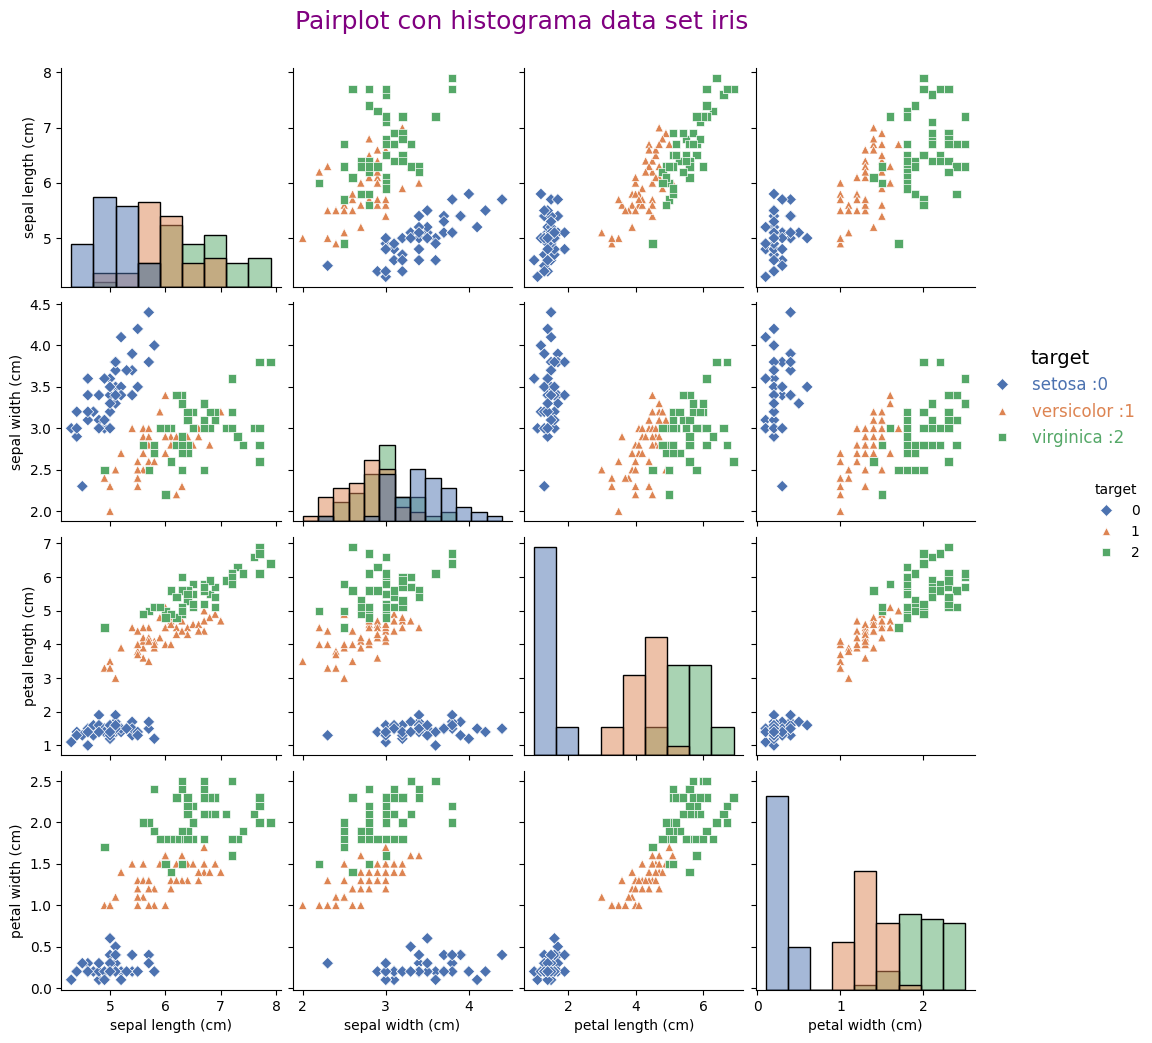

In [18]:
grafica = sns.pairplot(data=df_iris, hue="target",markers=["D","^","s"],palette='deep',diag_kind="hist")
# adquiero los handels y labels 
handles, labels = grafica._legend_data.values(), grafica._legend_data.keys()
# remueve la leyenda automatica de seaborn 
#grafica._legend.remove()
# Colores de la paleta 'deep'
palette_colors = sns.color_palette('deep', n_colors=len(labels))
# crea una leyenda personalizada
plt.legend(title='target',handles=handles ,labels=[ 'setosa :0', 'versicolor :1','virginica :2']
           , frameon=False,bbox_to_anchor=(1.8, 3), labelcolor=palette_colors, fontsize=12,title_fontsize=14)
# titulo
plt.suptitle("Pairplot con histograma data set iris", fontsize=18,y=1.04, color="purple")
plt.show()


La salida anterior presenta el pairplot con el histograma, otra opción en mostrar el kde densidad de kernel estimada

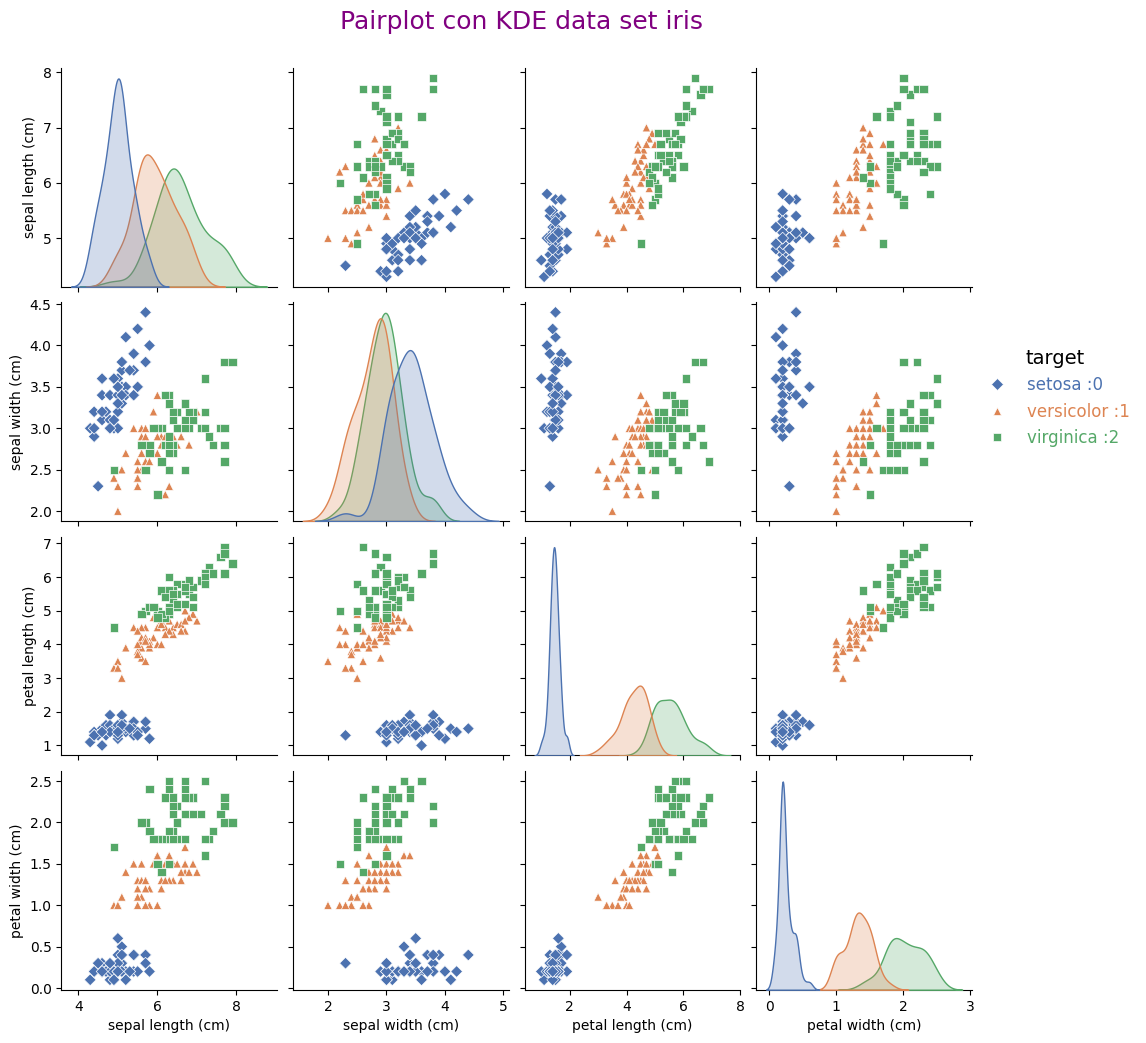

In [19]:
grafica = sns.pairplot(data=df_iris, hue="target",markers=["D","^","s"],palette='deep')
# adquiero los handels y labels 
handles, labels = grafica._legend_data.values(), grafica._legend_data.keys()
# remueve la leyenda automatica de seaborn 
grafica._legend.remove()
# Colores de la paleta 'deep'
palette_colors = sns.color_palette('deep', n_colors=len(labels))
# crea una leyenda personalizada
plt.legend(title='target',handles=handles ,labels=[ 'setosa :0', 'versicolor :1','virginica :2']
           , frameon=False,bbox_to_anchor=(1.8, 3), labelcolor=palette_colors, fontsize=12,title_fontsize=14)
# titulo
plt.suptitle("Pairplot con KDE data set iris", fontsize=18,y=1.04, color="purple")
plt.show()

Los salidas anteriores de los pairplot nos muestra que tan separables son las caracteristicas en pares, por ejemplo vemos que la clase mas separable es la setosa(azul). 

##### 2. Analiza la complejidad de diferentes modelos KNN, variando el número de vecinos y midiendo el desempeño del modelo entrenado para cada caso. Posteriormente, en una celda de texto, explica cuál es el mejor modelo y por qué.

Para realizar este punto, se realizaran los siguintes pasos:a
* Dividir los datos en entranamiento y test
*Estandarisar los datos  
* Finalmente entrenar el modelo KNN (K-Nearest Neighbors) variando el hiperparametro K y evaluando el accuracy de los modelos obtenidos con los datos de entrenamiento y test para cada valor de k.

 **split de los datos en train y test**
 
Para este split se utilizara el 0.2 o 20% de los datos para prueba. 

In [20]:
from sklearn.model_selection import train_test_split # funcion para partionar los datos 

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_iris[columnas], df_iris["target"], test_size=0.2, 
                                                    random_state=42, stratify=df_iris["target"])


El parametro stratify garantiza que permanezca el balanceo de clases, veamos: 

In [21]:
y_train.value_counts(normalize=True) 

target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

In [22]:
y_test.value_counts(normalize=True) 

target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

O sin la normalización 

In [23]:
y_train.value_counts() 

target
0    40
2    40
1    40
Name: count, dtype: int64

In [24]:
y_test.value_counts()

target
0    10
2    10
1    10
Name: count, dtype: int64

Tambien veamos que corresponde a el mismo numero de filas X y y

In [25]:
print(f"Dimensión de X_train {X_train.shape}")
print(f"Dimensión de y_train {y_train.shape}")
print(f"Dimensión de X_test {X_test.shape}")
print(f"Dimensión de X_test {y_test.shape}")

Dimensión de X_train (120, 4)
Dimensión de y_train (120,)
Dimensión de X_test (30, 4)
Dimensión de X_test (30,)


Vemos que el número de filas conciden. 

**Estandarización de los datos**

Para esto se uso el metodo StandardScaler del modulo klearn.preprocessing, esto lo que hace es standarizar los datos esto es transformarlo en un nuevo conjunto de datos con media 0 y desviación standar cero, usdando la siguiente ecuación:
$$z_{i}=\frac{\bar{x}-x_i}{\sigma}
$$
Donde z es la variable estandarizada con $\bar{z}=0$ y $\sigma=1$


In [26]:
from sklearn.preprocessing import StandardScaler
# creamos el objeto que transforma los datos 
estandartizador = StandardScaler()
# ajustamos el transformador con con los datos de train 
estandartizador.fit(X_train,y_test)

StandardScaler()

Ya con el modelo ajustado obtenemos los datos estandarizados 

In [27]:
Xst_train = estandartizador.transform(X_train)
Xst_test = estandartizador.transform(X_test)

Calculemos la media y la desviacióin estandar de los datos estandarizados

In [28]:
print(f"Medias de caracteristicas de X_train {np.mean(Xst_train,axis=0)}")
print(f"Medias de caracteristicas de X_test {np.mean(Xst_train,axis=0)}")

Medias de caracteristicas de X_train [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]
Medias de caracteristicas de X_test [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]


Vemos que la media de cada caracteristica es aproximadamente cero para todas las caracteristicas train y test, ahora la desviación estandar

In [29]:
print(f"Desviación de caracteristicas de X_train {np.std(Xst_train,axis=0)}")
print(f"Desviación estandar de caracteristicas de X_test {np.std(Xst_train,axis=0)}")

Desviación de caracteristicas de X_train [1. 1. 1. 1.]
Desviación estandar de caracteristicas de X_test [1. 1. 1. 1.]


Vemos qie la desviación es 1 para todas las caracteristicas train y test

**Entrenamiento del modelo  KNN (K-Nearest Neighbors) variando el hiperparametro K**

Para esto crearemos modelos utilizando un cilco for y variando k entre 1 a 50.

creando los modelos 

In [30]:
# importanto el clasificador de sklearn
from sklearn.neighbors import KNeighborsClassifier
# número de vecinos
k= 50
numero_k = np.arange(1,k+1) 
modelos_entrenados_knn=[]
# for para crear los clasificadores KNN y entrenarlos
for k in numero_k:    
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(Xst_train,y_train) # se entrena con los datos de entrenamiento
    modelos_entrenados_knn.append(knn_classifier)


In [31]:
modelos_entrenados_knn

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=2),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=4),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=6),
 KNeighborsClassifier(n_neighbors=7),
 KNeighborsClassifier(n_neighbors=8),
 KNeighborsClassifier(n_neighbors=9),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=11),
 KNeighborsClassifier(n_neighbors=12),
 KNeighborsClassifier(n_neighbors=13),
 KNeighborsClassifier(n_neighbors=14),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=16),
 KNeighborsClassifier(n_neighbors=17),
 KNeighborsClassifier(n_neighbors=18),
 KNeighborsClassifier(n_neighbors=19),
 KNeighborsClassifier(n_neighbors=20),
 KNeighborsClassifier(n_neighbors=21),
 KNeighborsClassifier(n_neighbors=22),
 KNeighborsClassifier(n_neighbors=23),
 KNeighborsClassifier(n_neighbors=24),
 KNeighborsClassifier(n_neighbors=25),
 KNeighborsClassifier(n_neighbors=26),
 KNeighb

Vemos los 50 modelos entrenados, el valor k=5 es el predeterminado por eso no sale. 

Ahora necesitamos la métrica accuracy para evaluar los modelos tanto en train como en test para ver la capacidad de generalización de modelo, y que la complejidad del mismo no se transforme en un sobreajuste de los datos de entrenamiento.

El accuracy de un modelo esta dado por:
$$
Accuracy = \frac{\text{Numero de predicciones correctas del modelo}}{\text{Numero de predicciones del modelo}}
$$
y está relacionado con el error por 

$$
Accuracy = 1- error 
$$

donde el error es la fracción de predcciones incorrectas del modelo

Importemos el accuracy del modulo sklearn.metrics  

In [32]:
from sklearn.metrics import accuracy_score

Creemos un ciclo for para evaluar los modelos en entrenamiento y prueba, para luego graficar cada uno y ver el comportamiento del modelo en función del parametro k numero de vecinos cercanos utilizados. 

In [33]:
accuracys_trains =[]
accuracys_test =[]
for indice, modelo in enumerate(modelos_entrenados_knn):
    # predicciones del modelo 
    y_pred_train = modelo.predict(Xst_train)
    y_pred_test = modelo.predict(Xst_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracys_trains.append(accuracy_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracys_test.append(accuracy_test) 

Ya teniendo todos los valores del desempeño del modelo tanto en test como en train, se pasa a graficar las curvas de complejidad y capacidad de generalización del modelo 

Antes de graficas los modelos entrenados definimos el concepto de complejidad y generalización en machine learning.

**Complejidad**

Se interpeta como que tan bien predice un modelo sobre el conjunto de datos de entremaniento, entre mas complejo un modelo mejor es su desempeño en el conjunto datos de entrenamiento, sin embargo, esto hace que pierda capacidad de generalización.

**Generalización**
Se interpreta como que tan bien predice un modelo sobre datos no vistos es decir, sobre los datos de prueba.

Ya teniendo estos dos conceptos, lo que, se desea al entrenar un modelo es que prediga bastante bien sobre los datos de entrenamiento sin perder capacidad de generalización, se puede decir que cuando la capaciadad de generalización sea maxima y se tenga un buen desempeño en los datos de entrenamiento se alcanza el punto optimo del modelo o punto de balance. 


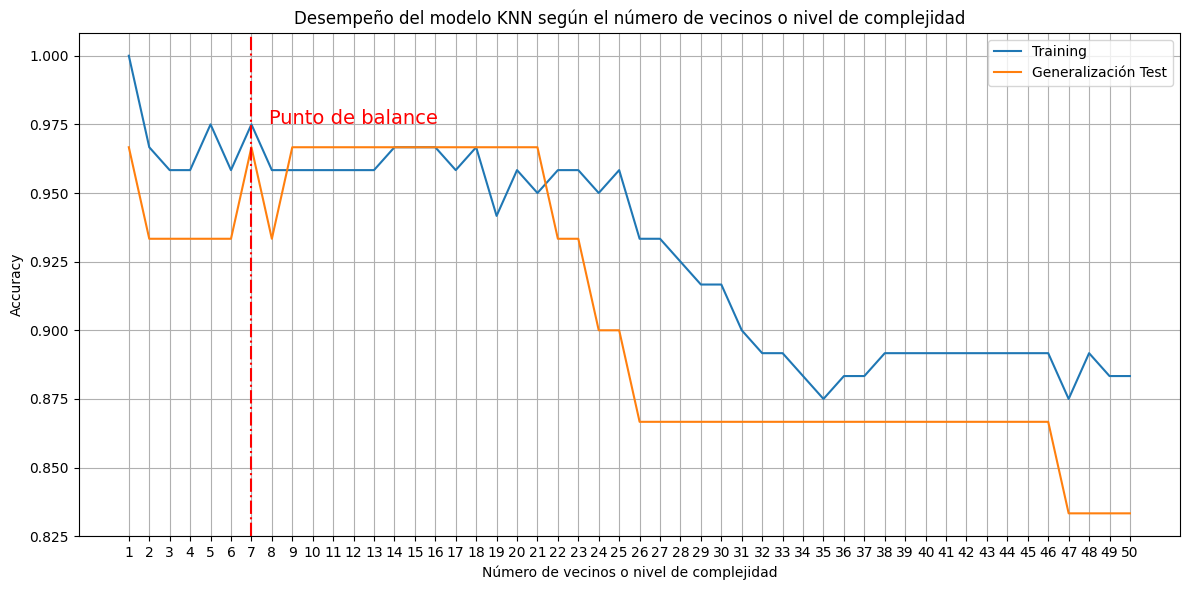

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(numero_k, accuracys_trains, label = "Training")
plt.plot(numero_k, accuracys_test, label = "Generalización Test")
plt.title('Desempeño del modelo KNN según el número de vecinos o nivel de complejidad')
plt.axvline(x=7, color='red', linestyle='-.')
plt.xlabel('Número de vecinos o nivel de complejidad')
plt.ylabel('Accuracy')
plt.xticks(numero_k)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.text(12,0.975 , 'Punto de balance', fontsize=14, ha='center',color='red')
plt.show()



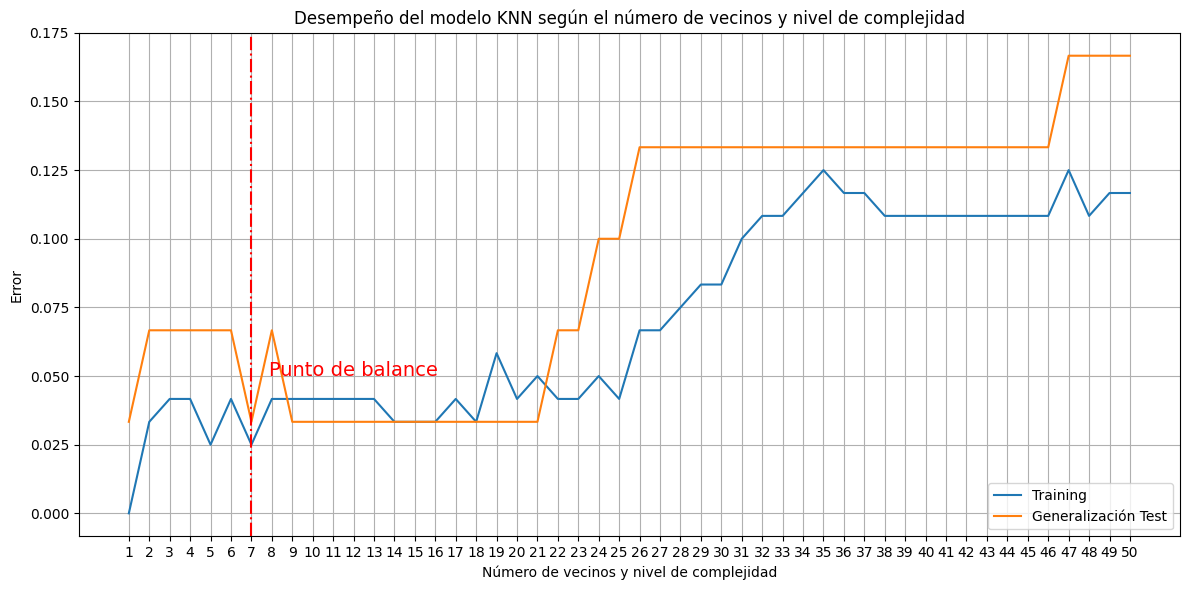

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(numero_k, 1-np.array(accuracys_trains), label = "Training")
plt.plot(numero_k, 1-np.array(accuracys_test), label = "Generalización Test")
plt.axvline(x=7, color='red', linestyle='-.')
plt.title('Desempeño del modelo KNN según el número de vecinos y nivel de complejidad')
plt.xlabel('Número de vecinos y nivel de complejidad')
plt.ylabel('Error')
plt.xticks(numero_k)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.text(12,0.05 , 'Punto de balance', fontsize=14, ha='center',color='red')
plt.show()


De las gráficas anteriores se puede observar que el punto de balance óptimo entre la complejidad y la generalización del modelo es para k = 7. Aunque, presenta un poco mas sobreajuste en los datos de entrenamiento comparado con k variando de 9 a 13.

Por tanto, el mejor modelo es el que se entreno con $k=7$ ya que presenta un alto grado de generalización (el mayor con otros valores de k) y un buen nivel de complejidad no demasiado, como cuando k=1 que presenta un sobreajuste tan alto que el error es cero (0) sobre los datos de entrenamiento. Para valores de k >=9, tenemos menos sobreajuste o menos complejidad en los datos de entrenamiento, y son modelos que tambien se podrian tener en cuenta, pero teniendo en cuenta su costo computacional y que el numero de datos es muy pequeño no parecen ser una buena opción. Para realmente tener esto en cuenta deberiamos tener un conjunto de datos mas grande  

In [53]:
mejor_modelo = modelos_entrenados_knn[6]
print(f"Numero de vecinos en el mejor modelo k={mejor_modelo.n_neighbors}")
mejor_modelo

Numero de vecinos en el mejor modelo k=7


KNeighborsClassifier(n_neighbors=7)

##### 3. Obten y analiza la matriz de confusión para el modelo escogido a partir del análisis de complejidad. (Confusion Matrix, Visualización Confusion Matrix )

Ya habiendo escojido el mejor modelo podemos calcular con el modulo sklearn.metrics la matriz de confusión de los datos Pero antes, introducimos el concepto de matriz de confusión.

La matriz de confusión para un clasificador binario muestra el desempeño del modelo comparando las etiquetas o labesl predichos del modelos con los reales, por ejemplo para los datos de prueba. Es esta se consignan el número de TP verdaderos positivos, TN verdadderos negativos,FP falso positivos, vease este [link](https://www.evidentlyai.com/classification-metrics/confusion-matrix). 

<div style="text-align:center;">
    <p style="text-align:center; font-family: Arial, sans-serif; font-size: 18px; font-weight: bold; margin-bottom: 2px;">Matriz de confusión</p>
    <img src="matriz de confusion.jpg">
    <p style="text-align:center;">Matriz de confusión donde se evaluan el perfomace de un clasificador binario, teniendo en cuenta las etiquetas reales que representan las filas y las etiquetas predichas por el modelo que representan las columnas</p>
</div>



Ya entendiendo que es la matriz de confusión pasamos a graficarla para el mejor modelo de KNN.

In [37]:
# funcuona para calcular la matriz de confusión
from sklearn.metrics import confusion_matrix

# predicciones del mejor modelo para train
y_pred_mejor_train = mejor_modelo.predict(Xst_train)

# predicciones del mejor modelo para test
y_pred_mejor_test = mejor_modelo.predict(Xst_test)

# matriz de confusión para los datos de train 
confusion_matrix_train = confusion_matrix(y_train, y_pred_mejor_train)

# matriz de confusión para los datos de prueba 
confusion_matrix_test = confusion_matrix(y_test, y_pred_mejor_test)

Ya obteniendo las matrices de confusión pasamos a graficarlas en seaborn

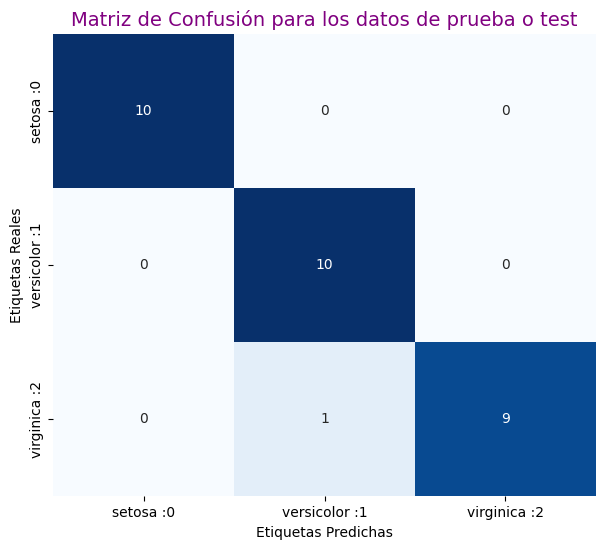

In [38]:
plt.figure(figsize=(7, 6))
labels = [ 'setosa :0', 'versicolor :1','virginica :2']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='g', 
            cbar=False,xticklabels=labels, yticklabels=labels)
# Añadir etiquetas y títulos
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión para los datos de prueba o test',fontsize=14, color= "purple")
plt.show()

Para los datos de prueba vemos que solo se equivoca en 1 muetras de la clase virginica, clasificandolo en la clase versicolor, por eso el accuracy es de 0.97 o el error es de 0.03 o 3%. 

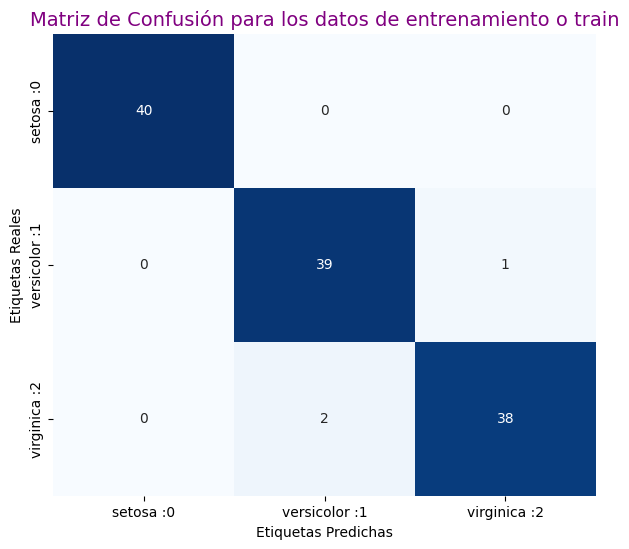

In [39]:
plt.figure(figsize=(7, 6))
labels = [ 'setosa :0', 'versicolor :1','virginica :2']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='g', 
            cbar=False,xticklabels=labels, yticklabels=labels)
# Añadir etiquetas y títulos
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión para los datos de entrenamiento o train',fontsize=14, color= "purple")
plt.show()

Para los datos de entrenamiento vesmos que se equivoca solo en tres (3) datos uno (1) de la clase versicolor clasificandolo como virginica y dos (2) de la clase virginica clasificandolos como versicolor.

De las matrices de confusión anteriores se puede observar que la clase con mayor presición o mejor clasificada es la setosa, lo cual, era de esperar ya que en el grafico de pairplot vemos que es bastante separable de las clases versicolor y virginica, mientras, que, que las clases virginica y versicolor estan entre mezcladas, es decir no son tan facilmente separables, por tanto, es de esperar que el modelo cometa algun error aqui y esto se ve reflajado en la matriz de confusión en las clases predichas ya que los errores del modelos están sobre estan clases intercarbiandolas.   

##### 4. Investigue qué son las métricas recall, precisión y exactitud, cómo se implementan en Python, y obtenlas para el modelo escogido. ¿Qué tan bueno es el modelo para realizar la tarea de predicción? Explique en celda de texto.

Para realizar esto primero definiremos cada métrica: 
##### Acccuracy o exactitud
El accurracy se define inicialmente como 

$$
Accuracy = \frac{\text{Numero de predicciones correctas del modelo}}{\text{Numero de predicciones del modelo}}
$$

o en terminos del procentaje de error en la clasificación del modelo 

$$
Accuracy = 1- error 
$$

Donde el error se define como la fracción de clasificaciones mal realizadas por el modelo.

Por tanto, el accuraccy es una medida del desempeño del modelo y varia entre el intervalo [0,1] donde uno (1) significa  que el modelo no falla en predecir ninguna muestra y 0 que no califica ninguna correctamente, ademas, 1/2 tambien es un valor especial ya que si los datos estan balanceados y los calificamos todos como positivos o negativos el valor del accuracy es 1/2, por tanto, simpre se debe esperar que el valor del accuracy este por encima de, también, este valor que lo da un clasificador aleatorio cuyo desempeño es 1/2.   

Otra definición del accuracy es en terminos de los elemento de la matriz de confusión:
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+PN}
$$

donde TP son los True positive, TN son los True negative, FP son los False positive y FN los False Negative.

**Desventajas del acurracy**
* No es sensible al desbalance de clases, por ejemplo si tenemos 1000 muestras positivas y 10 negativas, y un modelo clasifica 900 como positivas entre ellas las 10 negativas, el accuracy es de 0.89 es decir muy alto, pero con respecto a la clase negativo no predijo ninguna muestra correctamente.

* No es sensible a el error  por clase es decir toma todo los errores de clasificación, por igual, por ejemplo si estamos identificando pacientes con cancer es muy importante que las clase enfermo de cancer se clasifique de la manera mas correcta, por tanto, el error de clasificar mal una muestra de paciente enfermo es m´ss alto que la de clasificar mal un paciente sano, por tanto, esta métrica no es muy buena para un problema de este tipo y debe estar acompañana de otra por lo menos. En otras palabras el accuracy no es sensible a el error de clase.

##### Presición 
La presición se define en terminos de la matriz de confusión como:
$$
Presición = \frac{TP}{TP+FP}
$$
Basicamente nos indica cuantas muestras han sido calificadas como falsas positivas, por tanto, es util cuando el costo de los falsos positivos es alto, tambien cuando nuestro enfoque se centra en una clase en particular su valor varia entre [0,1] cero cuando no se clasifico ninguna muestra positiva como positiva y uno cuando los flasos positivos son cero, ademas, es relativamente una buena métrica si tenemos un conjunto de datos desbalancedo no tan fuertemente ya que se centra sobre una clase en particular (clase positiva). La presición por si sola no puede evaluar correctamente un modelo ya que no tiene encuenta la clase negativa.

**Desventajas**
* No considera los falsos negativos que son intancias o muestras de la clase positiva que fueron clasificados erroneamente

##### recall
El recall se define en terminos de la matriz de confusión como:
$$
Recall = \frac{TP}{TP+FN}
$$

El recall es util cuando el error asociado a los falsos negativos es grande, también, es util cuando uno se centra sobre una clase en particular (clase positiva). Esta métrica varia entre [0,1] cero cuando no se clasifica ninguna muestra de la clase positiva correctamete y uno cuando no hay falsos negativos. 

**Desventajas**
* No considera los falsos positivos, por tanto, por si solo no es una métrica pára evaluar correctamente el rendicmiento de un modelo, pues no considera todas sus clases.
  
#### F1score 
El f1score es una métrica quer combina la presición y el recall, se define como: 
$$
f1score = 2\frac{presicion\text{x}recall}{presicion+recall}
$$
El f1score varia entre [0,1], su valor es uno cuando no hay falsos positivos ni falsos negativos. porporciona un equilibrio entre el reclla y la presición. Por tanto, es util para conjuntos de datos balanceados. 

**Desventajas**
* Puede ocultar desequilibrios extremos entre precisión y recall
* No considera los verdaderos negativos, lo que puede ser relevante en algunos casos



##### Problemas multiclase 
Para los problemas multiclas se definen las métricas como: 

El *accuracy* multiclase se define como la fracción de predicciones correctas del clasificador. Se puede calcular con la siguiente fórmula:

$$
\text{acc}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n-1} 1(\hat{y}_i = y_i)
$$

dónde $y$ corresponde a la lista de etiquetas de verdad de nuestro conjunto de datos, mientras $\hat{y}$ corresponde a los valores predichos por nuestro clasificador para el mismo conjunto de datos **en el mismo orden**, y $n$ corresponde al número de ejemplos del conjunto. 


Para la presición y el recall, se utiliza: 

* micro : Cuenta el total de positivos verdaderos, falsos positivos y falsos negativos para realizar el cálculo de la métrica.
* macro : Calcula la métrica por cada clase y luego la promedia (sin tener en cuenta el balance de clases).
* weighted : Calcula la precisión por clase y luego la promedia teniendo en cuenta el balance de clases.

**Micro**
La métrica micro calcula la precisión, recall, f1-score, etc. de forma global, contando los verdaderos positivos, falsos positivos y falsos negativos de todas las clases.

*Presición Micro*:

$$
Presicionmicro=\frac{\sum_{i=1}^{N}{TP_i}}{\sum_{i=1}^{N}{TP_i + FP_i}}
$$
Donde $TP_i$ son los verdaderos positivos para la clase $i$, $FP_i$ son los falsos positivos para la clase i  y  N es el numero de clases 

*recall Micro*:

$$
Recallmicro=\frac{\sum_{i=1}^{N}{TP_i}}{\sum_{i=1}^{N}{TP_i + FN_i}}
$$
Donde $TP_i$ son los verdaderos positivos para la clase $i$, $FN_i$ son los falsos Nagativos para la clase i  y  N es el numero de clases 

*F1score Micro*:

$$
f1scoremicro = 2\frac{presicionmicro\text{x}recallmicro}{presicionmicro+recallmicro}
$$

Curiosamente el f1scoremicro se transforma en el acuracy del modelo

**Macro**
La métrica macro calcula la métrica para cada clase y luego toma el promedio sin ponderar por el número de instancias en cada clase.
Presición Macro:

*Presición Macro*:
$$
Presicionmacro=\frac{\sum_{i=1}^{N}{p_i}}{N}
$$

Donde $p_i$ en la presición para la clase i y N el numero de clases. 

*Recall Macro*:

$$
Recallmacro=\frac{\sum_{i=1}^{N}{r_i}}{N}
$$
Donde $r_i$ en el racall para la clase i y N el numero de clases. 

*F1score Macro*:

$$
f1scoremacro = \frac{\sum_{i=1}^{N}{f1score_i}}{N}
$$

Donde $f1score_i$ en el f1score para la clase i y N el numero de clases. 


**Weighted**
La métrica weighted calcula la métrica para cada clase y luego toma el promedio ponderado por el número de instancias en cada clase, es decir se pondera segun la fracción de cada clase.

*Presición Weighted*:
$$
Presicionweighted=\frac{\sum_{i=1}^{N}{w_ip_i}}{N}
$$

Donde $p_i$ en la presición para la clase i, $w_i$ es la fraccón de la clase i y N el numero de clases. 

*recall Weighted*:

$$
Recallweighted=\frac{\sum_{i=1}^{N}{w_ir_i}}{N}
$$
Donde $r_i$ en el racall para la clase i, $w_i$ es la fraccón de la clase i y N el numero de clases. 

*F1score Weighted*:

$$
f1score weighted= \frac{\sum_{i=1}^{N}{w_if1score_i}}{N}
$$

Donde $f1score_i$ en el f1score para la clase i, $w_i$ es la fraccón de la clase i y N el numero de clases. 

##### Conclusiones
* Se concluye que el accuracy es una buena métrica para evaluar modelos con clases balanceadas
* La presición y el recall nos sirve para evaluar modelos con desbalance de clases
* En general es importante utilizar todas la métricas anteriores para evaluar de manera mas general el modelos, pero tambien, se pueden creaar métricas personalizadas segun el probelma a analizar en cuestión.

Finalamente se evaluaran las métricas anteriores milticlas para el problema en cuestión.

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_mejor_test = mejor_modelo.predict(Xst_test)
y_pred_mejor_train = mejor_modelo.predict(Xst_train)

Ya teniendo las predicciones del modelo podemos evaluar las métricas.

Primero para cada clase

In [41]:
print(f'Orden de las etiquetas: \t{labels}')
print(f'Precisión por clase test: \t{precision_score(y_test, y_pred_mejor_test, average=None)}')
print(f'Recall por clase test: \t\t{recall_score(y_test, y_pred_mejor_test, average=None)}')
print(f'F1score por clase test: \t{f1_score(y_test, y_pred_mejor_test, average=None)}')
print(f'Precisión por clase train: \t{precision_score(y_train, y_pred_mejor_train, average=None)}')
print(f'Recall por clase train: \t{recall_score(y_train, y_pred_mejor_train, average=None)}')
print(f'F1score por clase train: \t{f1_score(y_train, y_pred_mejor_train, average=None)}')

Orden de las etiquetas: 	['setosa :0', 'versicolor :1', 'virginica :2']
Precisión por clase test: 	[1.         0.90909091 1.        ]
Recall por clase test: 		[1.  1.  0.9]
F1score por clase test: 	[1.         0.95238095 0.94736842]
Precisión por clase train: 	[1.         0.95121951 0.97435897]
Recall por clase train: 	[1.    0.975 0.95 ]
F1score por clase train: 	[1.         0.96296296 0.96202532]


Ahora las métricas accuracy y micro, macro y weighted para cada métrica.

In [42]:
print(f'Accuracy test:\t\t\t{accuracy_score(y_test, y_pred_mejor_test):.3f}')
print(f'Precisión micro test: \t\t{precision_score(y_test, y_pred_mejor_test, average="micro"):.3f}')
print(f'Precisión macro test: \t\t{precision_score(y_test, y_pred_mejor_test, average="macro"):.3f}')
print(f'Precisión weighted test: \t{precision_score(y_test, y_pred_mejor_test, average="weighted"):.3f}')
print(f'Recall micro test: \t\t{recall_score(y_test, y_pred_mejor_test, average="micro"):.3f}')
print(f'Recall macro test: \t\t{recall_score(y_test, y_pred_mejor_test, average="macro"):.3f}')
print(f'Recall weighted test: \t\t{recall_score(y_test, y_pred_mejor_test, average="weighted"):.3f}')
print(f'F1score micro test: \t\t{f1_score(y_test, y_pred_mejor_test, average="micro"):.3f}')
print(f'F1score macro test: \t\t{f1_score(y_test, y_pred_mejor_test, average="macro"):.3f}')
print(f'F1score weighted test: \t\t{f1_score(y_test, y_pred_mejor_test, average="weighted"):.3f}')

Accuracy test:			0.967
Precisión micro test: 		0.967
Precisión macro test: 		0.970
Precisión weighted test: 	0.970
Recall micro test: 		0.967
Recall macro test: 		0.967
Recall weighted test: 		0.967
F1score micro test: 		0.967
F1score macro test: 		0.967
F1score weighted test: 		0.967


In [43]:
print(f'Accuracy train:\t\t\t{accuracy_score(y_test, y_pred_mejor_test):.3f}')
print(f'Precisión micro train: \t\t{precision_score(y_train, y_pred_mejor_train, average="micro"):.3f}')
print(f'Precisión macro train: \t\t{precision_score(y_train, y_pred_mejor_train, average="macro"):.3f}')
print(f'Precisión weighted train: \t{precision_score(y_train, y_pred_mejor_train, average="weighted"):.3f}')
print(f'Recall micro train: \t\t{recall_score(y_train, y_pred_mejor_train, average="micro"):.3f}')
print(f'Recall macro train: \t\t{recall_score(y_train, y_pred_mejor_train, average="macro"):.3f}')
print(f'Recall weighted train: \t\t{recall_score(y_train, y_pred_mejor_train, average="weighted"):.3f}')
print(f'F1score micro train: \t\t{f1_score(y_train, y_pred_mejor_train, average="micro"):.3f}')
print(f'F1score macro train: \t\t{f1_score(y_train, y_pred_mejor_train, average="macro"):.3f}')
print(f'F1score weighted train: \t{f1_score(y_train, y_pred_mejor_train, average="weighted"):.3f}')

Accuracy train:			0.967
Precisión micro train: 		0.975
Precisión macro train: 		0.975
Precisión weighted train: 	0.975
Recall micro train: 		0.975
Recall macro train: 		0.975
Recall weighted train: 		0.975
F1score micro train: 		0.975
F1score macro train: 		0.975
F1score weighted train: 	0.975


En Scikit-Learn permite realizar un reporte general con todas las métricas mencionadas con la función classification_report del módulo sklearn.metrics:

In [44]:
from sklearn.metrics import classification_report
print("Reporte para Test")
print(classification_report(y_test,    
                            y_pred_mejor_test,                                
                            target_names=labels,  
                            digits=4)) 
print("Reporte para Train")
print(classification_report(y_train,    
                            y_pred_mejor_train,                                
                            target_names=labels,  
                            digits=4)) 

Reporte para Test
               precision    recall  f1-score   support

    setosa :0     1.0000    1.0000    1.0000        10
versicolor :1     0.9091    1.0000    0.9524        10
 virginica :2     1.0000    0.9000    0.9474        10

     accuracy                         0.9667        30
    macro avg     0.9697    0.9667    0.9666        30
 weighted avg     0.9697    0.9667    0.9666        30

Reporte para Train
               precision    recall  f1-score   support

    setosa :0     1.0000    1.0000    1.0000        40
versicolor :1     0.9512    0.9750    0.9630        40
 virginica :2     0.9744    0.9500    0.9620        40

     accuracy                         0.9750       120
    macro avg     0.9752    0.9750    0.9750       120
 weighted avg     0.9752    0.9750    0.9750       120



Finalmente se consinaran los resultados en una dataframe, para una facil visualización. 

In [45]:
TP = np.diagonal(confusion_matrix_test)
FP = [confusion_matrix_test[1:,0].sum(), confusion_matrix_test[0,1]
      + confusion_matrix_test[2,1],confusion_matrix_test[:-1,2].sum()]
FN = [confusion_matrix_test[0,1:].sum(), confusion_matrix_test[1,0]
      + confusion_matrix_test[1,2],confusion_matrix_test[2,:-1].sum()]
PRE = list(precision_score(y_test, y_pred_mejor_test, average=None))+\
     [precision_score(y_test, y_pred_mejor_test, average="micro"),
     precision_score(y_test, y_pred_mejor_test, average="macro"),
     precision_score(y_test, y_pred_mejor_test, average="weighted")]
REC = list(recall_score(y_test, y_pred_mejor_test, average=None))+\
        [recall_score(y_test, y_pred_mejor_test, average="micro"),
         recall_score(y_test, y_pred_mejor_test, average="macro"),
         recall_score(y_test, y_pred_mejor_test, average="weighted")]
F1 = list(f1_score(y_test, y_pred_mejor_test, average=None))+\
        [f1_score(y_test, y_pred_mejor_test, average="micro"),
         f1_score(y_test, y_pred_mejor_test, average="macro"),
         f1_score(y_test, y_pred_mejor_test, average="weighted")]
dic_test = {"Clases":labels+["Micro","Macro","Weighted"],"TP":list(TP)+[None,None,None],
            "FP":FP+[None,None,None],"FN":FN+[None,None,None],"presición":PRE,"Recall":REC,"F1score":F1}
df_metricas_test = pd.DataFrame(dic_test)
 

Daraframe para test 

In [46]:
df_metricas_test

,Clases,TP,FP,FN,presición,Recall,F1score
0,setosa :0,10.0,0.0,0.0,1.000000,1.000000,1.000000
1,versicolor :1,10.0,1.0,0.0,0.909091,1.000000,0.952381
2,virginica :2,9.0,0.0,1.0,1.000000,0.900000,0.947368
3,Micro,NaN,NaN,NaN,0.966667,0.966667,0.966667
4,Macro,NaN,NaN,NaN,0.969697,0.966667,0.966583
5,Weighted,NaN,NaN,NaN,0.969697,0.966667,0.966583


Dataframe para train

In [47]:
TP = np.diagonal(confusion_matrix_train)
FP = [confusion_matrix_train[1:,0].sum(), confusion_matrix_train[0,1]
      + confusion_matrix_train[2,1],confusion_matrix_train[:-1,2].sum()]
FN = [confusion_matrix_train[0,1:].sum(), confusion_matrix_train[1,0]
      + confusion_matrix_train[1,2],confusion_matrix_train[2,:-1].sum()]
PRE = list(precision_score(y_train, y_pred_mejor_train, average=None))+\
     [precision_score(y_train, y_pred_mejor_train, average="micro"),
     precision_score(y_train, y_pred_mejor_train, average="macro"),
     precision_score(y_train, y_pred_mejor_train, average="weighted")]
REC = list(recall_score(y_train, y_pred_mejor_train, average=None))+\
        [recall_score(y_train, y_pred_mejor_train, average="micro"),
         recall_score(y_train, y_pred_mejor_train, average="macro"),
         recall_score(y_train, y_pred_mejor_train, average="weighted")]
F1 = list(f1_score(y_train, y_pred_mejor_train, average=None))+\
        [f1_score(y_train, y_pred_mejor_train, average="micro"),
         f1_score(y_train, y_pred_mejor_train, average="macro"),
         f1_score(y_train, y_pred_mejor_train, average="weighted")]
dic_train = {"Clases":labels+["Micro","Macro","Weighted"],"TP":list(TP)+[None,None,None],
            "FP":FP+[None,None,None],"FN":FN+[None,None,None],"presición":PRE,"Recall":REC,"F1score":F1}
df_metricas_train = pd.DataFrame(dic_train)

In [48]:
df_metricas_train

,Clases,TP,FP,FN,presición,Recall,F1score
0,setosa :0,40.0,0.0,0.0,1.000000,1.000,1.000000
1,versicolor :1,39.0,2.0,1.0,0.951220,0.975,0.962963
2,virginica :2,38.0,1.0,2.0,0.974359,0.950,0.962025
3,Micro,NaN,NaN,NaN,0.975000,0.975,0.975000
4,Macro,NaN,NaN,NaN,0.975193,0.975,0.974996
5,Weighted,NaN,NaN,NaN,0.975193,0.975,0.974996


#### Conclusiones
* Se realizó un EDA para el conjunto de datos Iris
* Se estandarizarón los datos para el proceso clasificación  
* Se realizó la variación del hiperparametro K(número de vecinos) en el modelo KNN(K-Nearest Neighbors) para medir la complejidad en función del rendimiento del modelo (error o accuracy) para escvojer el mejor modelo con menor complejidad, obteniendo varias modelos con el mismo rendimiento y escojiendo el de mejor complejidad con K=7
* Se evalua el modelo con k=7 para diferentes métricas 
* El modelo separa perfectamente la clase setota, esto se debe a aque el valor de sus caracteristicas difieren bastante de las otras dos clases, lo que se puede observar del diagrama pairplot
* El accuracy del modelo es igual a 0.975 en train y 0.967 en test y teniendo en  cuenta que las calses están balanceadas es una buena medida del sempeño del modelo
* Las métricas se pueden calcular por clase o por micro, macro y weighted para presición, recall y f1score
* La matriz de confusión es fundamental a la hora de establecer métricas de evaluación para un modelo de clasificación, hasta con diferentes penalizaciones por clase
* El reporte y las métricas son: 
  

In [49]:
print("Reporte para Test")
print(classification_report(y_test,    
                            y_pred_mejor_test,                                
                            target_names=labels,  
                            digits=4)) 
display(df_metricas_test)
print("Reporte para Train")
print(classification_report(y_train,    
                            y_pred_mejor_train,                                
                            target_names=labels,  
                            digits=4)) 
df_metricas_train

Reporte para Test
               precision    recall  f1-score   support

    setosa :0     1.0000    1.0000    1.0000        10
versicolor :1     0.9091    1.0000    0.9524        10
 virginica :2     1.0000    0.9000    0.9474        10

     accuracy                         0.9667        30
    macro avg     0.9697    0.9667    0.9666        30
 weighted avg     0.9697    0.9667    0.9666        30



,Clases,TP,FP,FN,presición,Recall,F1score
0,setosa :0,10.0,0.0,0.0,1.000000,1.000000,1.000000
1,versicolor :1,10.0,1.0,0.0,0.909091,1.000000,0.952381
2,virginica :2,9.0,0.0,1.0,1.000000,0.900000,0.947368
3,Micro,NaN,NaN,NaN,0.966667,0.966667,0.966667
4,Macro,NaN,NaN,NaN,0.969697,0.966667,0.966583
5,Weighted,NaN,NaN,NaN,0.969697,0.966667,0.966583


Reporte para Train
               precision    recall  f1-score   support

    setosa :0     1.0000    1.0000    1.0000        40
versicolor :1     0.9512    0.9750    0.9630        40
 virginica :2     0.9744    0.9500    0.9620        40

     accuracy                         0.9750       120
    macro avg     0.9752    0.9750    0.9750       120
 weighted avg     0.9752    0.9750    0.9750       120



,Clases,TP,FP,FN,presición,Recall,F1score
0,setosa :0,40.0,0.0,0.0,1.000000,1.000,1.000000
1,versicolor :1,39.0,2.0,1.0,0.951220,0.975,0.962963
2,virginica :2,38.0,1.0,2.0,0.974359,0.950,0.962025
3,Micro,NaN,NaN,NaN,0.975000,0.975,0.975000
4,Macro,NaN,NaN,NaN,0.975193,0.975,0.974996
5,Weighted,NaN,NaN,NaN,0.975193,0.975,0.974996
